In [1]:
from ReliabilityAnalysis import distributions as rad
from ReliabilityAnalysis.maintenance_optimization import interval_replacement
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
dist = rad.weibull()
dist = dist(2.5,scale=10)
replacement_model = interval_replacement(dist)
replacement_model.cf = 5
replacement_model.cpm = 1
T = 5*dist.mean()

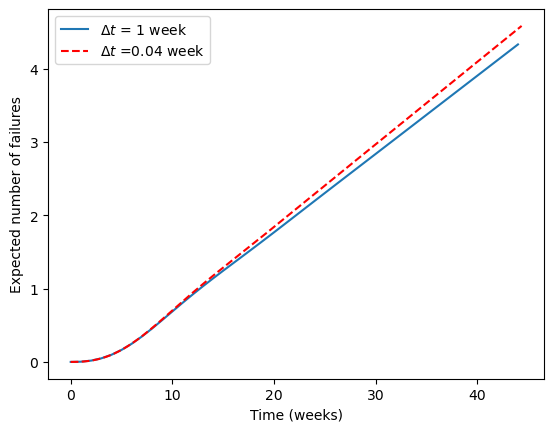

In [3]:
t_class,H_class = replacement_model.expected_number_of_failures(T=T,dt=1.0)
t,H = replacement_model.expected_number_of_failures(T=T)
plt.plot(t_class,H_class,label=r'$\Delta t$ = 1 week')
plt.plot(t,H,'r--',label=f'$\Delta t$ ={t[1]-t[0]:.2f} week')
plt.xlabel('Time (weeks)')
plt.ylabel('Expected number of failures')
plt.legend()

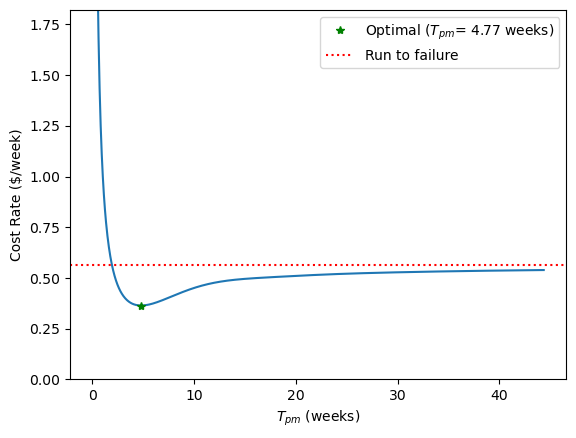

In [4]:
t,cr,idx_min = replacement_model.optimal_timing(T=T)

fig,ax = plt.subplots()
ax.plot(t,cr)
ax.plot(t[idx_min],cr[idx_min],'g*',label=f"Optimal ("+r"$T_{pm}$= "+f"{t[idx_min]:.2f} weeks)")
ax.axhline(replacement_model.cf/dist.mean(),color='r',ls=":",label="Run to failure")
ax.set_ylim((0,5*min(cr)))
ax.set_xlabel(r"$T_{pm}$ (weeks)")
ax.set_ylabel('Cost Rate ($/week)')
ax.legend()